In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma
import scipy.stats as stats

sns.set_style('whitegrid')

## 3.d

In [3]:
from itertools import product

def maeEstimate(X, n, theta):
    return {
        '$\\delta_1$': np.abs(X/n - theta).mean(),
        '$\\delta_2$': np.abs(0.5 - theta).mean(),
        '$\\delta_3$': np.abs((X+12)/(n+24) - theta).mean(),
        '$\\delta_4$': np.abs((X+1)/(n+2) - theta).mean(),
        '$\\delta_5$': np.abs((X+np.sqrt(n)/2)/(n+np.sqrt(n)) - theta).mean(),
    }

sampleSize = 500000
ns = [5, 100]
thetas = np.linspace(0, 1, 150)

maes = []
for n, theta in product(ns, thetas):
    X = np.random.binomial(n=n, p=theta, size=sampleSize)
    mae = maeEstimate(X, n, theta)
    mae['theta'] = theta
    mae['n'] = n
    maes.append(mae)

In [4]:
df = pd.DataFrame(maes)

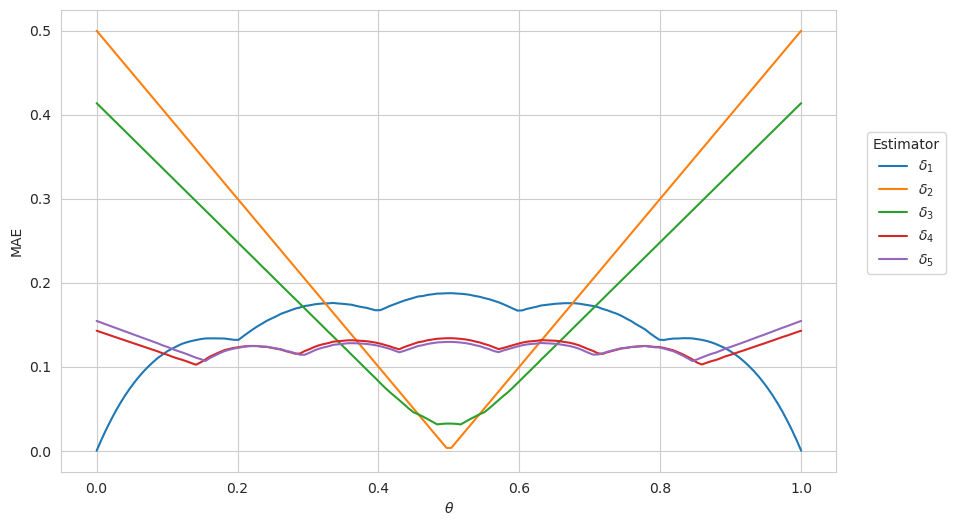

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

df[df.n==5].set_index('theta').drop(['n'], axis=1).plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MAE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.15, 0.75))
# ax.set_ylim(-0.002, 0.012)
fig.show()

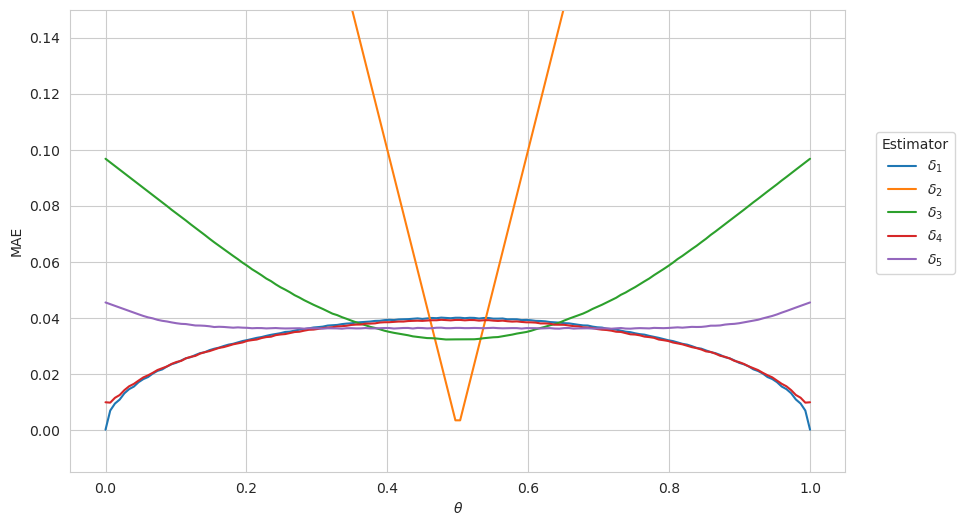

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

df[df.n==100].set_index('theta').drop(['n'], axis=1).plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MAE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.15, 0.75))
ax.set_ylim(-0.015, 0.15)
fig.show()

## PH 4.1

In [59]:
np.random.seed(235923523)

θ1 = stats.beta(a=57+1, b=1+100-57)
θ2 = stats.beta(a=30+1, b=1+50-30)
sampleSize = 1000000

θ1_samples = θ1.rvs(size=sampleSize)
θ2_samples = θ2.rvs(size=sampleSize)

In [60]:
(θ1_samples < θ2_samples).mean()

0.631572

<AxesSubplot:ylabel='Density'>

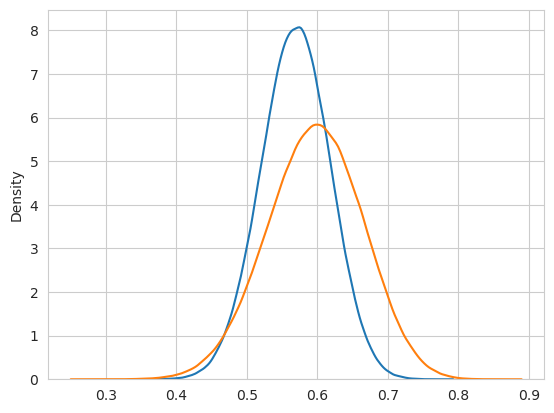

In [61]:
sns.kdeplot(θ1_samples)
sns.kdeplot(θ2_samples)

## PH 4.2

In [71]:
np.random.seed(235923523)

thetaAPost = stats.gamma(a=237, scale=1/20)
thetaBPost = stats.gamma(a=125, scale=1/14)

thetaAPostSamples = thetaAPost.rvs(100000)
thetaBPostSamples = thetaBPost.rvs(100000)

<AxesSubplot:ylabel='Density'>

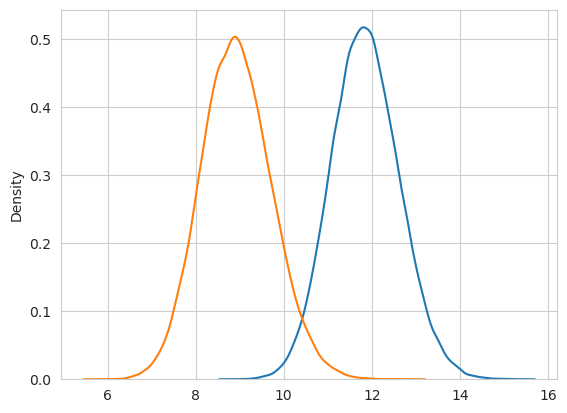

In [72]:
sns.kdeplot(thetaAPostSamples)
sns.kdeplot(thetaBPostSamples)

In [73]:
(thetaBPostSamples < thetaAPostSamples).mean()

0.99569

In [95]:
ps = []

n0s = np.linspace(1, 300, 150)
for n0 in n0s:
    thetaAPost = stats.gamma(a=237, scale=1/20)
    thetaBPost = stats.gamma(a=12*n0+113, scale=1/(n0+13))
    thetaAPostSamples = thetaAPost.rvs(100000)
    thetaBPostSamples = thetaBPost.rvs(100000)

    ps.append((thetaBPostSamples < thetaAPostSamples).mean())

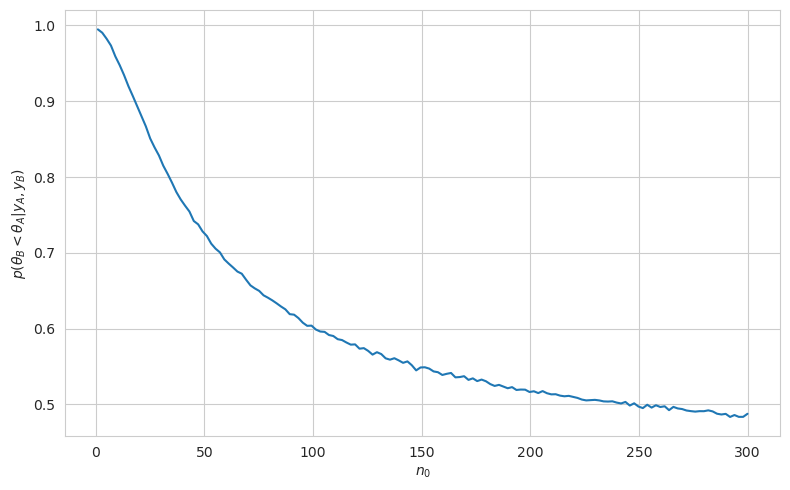

In [101]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(n0s, ps)
ax.set_xlabel("$n_0$")
ax.set_ylabel("$p(\\theta_B < \\theta_A|y_A, y_B)$")
fig.tight_layout()
fig.show()

In [135]:
nSamples = 100000

ps = []
n0s = np.linspace(1, 300, 150)
for n0 in n0s:
    thetaAPost = stats.gamma(a=237, scale=1/20)
    thetaAPostSample = thetaAPost.rvs(nSamples)
    thetaAPPDSample = stats.poisson(thetaAPostSample).rvs()

    thetaBPost = stats.gamma(a=12*n0+113, scale=1/(n0+13))
    thetaBPostSample = thetaBPost.rvs(nSamples)
    thetaBPPDSample = stats.poisson(thetaBPostSample).rvs()

    ps.append((thetaBPPDSample < thetaAPPDSample).mean())

In [142]:
ps[0]

0.69692

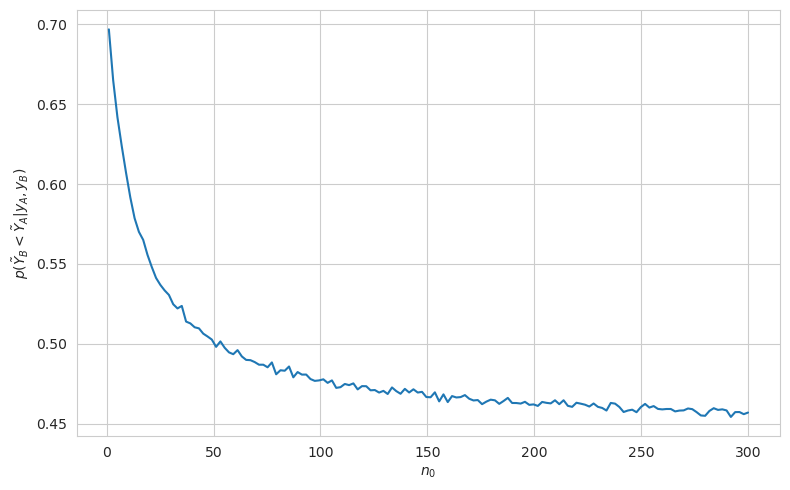

In [143]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(n0s, ps)
ax.set_xlabel("$n_0$")
ax.set_ylabel("$p(\\tilde{Y}_B < \\tilde{Y}_A|y_A, y_B)$")
fig.tight_layout()
fig.show()

## PH 4.4

In [178]:
from scipy.special import comb, gamma

beta1 = stats.beta(a=2, b=8)
w1 = 3/4

beta2 = stats.beta(a=8, b=2)
w2 = 1/4

thetas = np.linspace(0, 1, 1000000)
prior = pd.Series(w1 * beta1.pdf(thetas) + w2 * beta2.pdf(thetas), index=thetas)
likelihood = pd.Series(stats.binom.pmf(k=15, n=43, p=thetas), index=thetas)

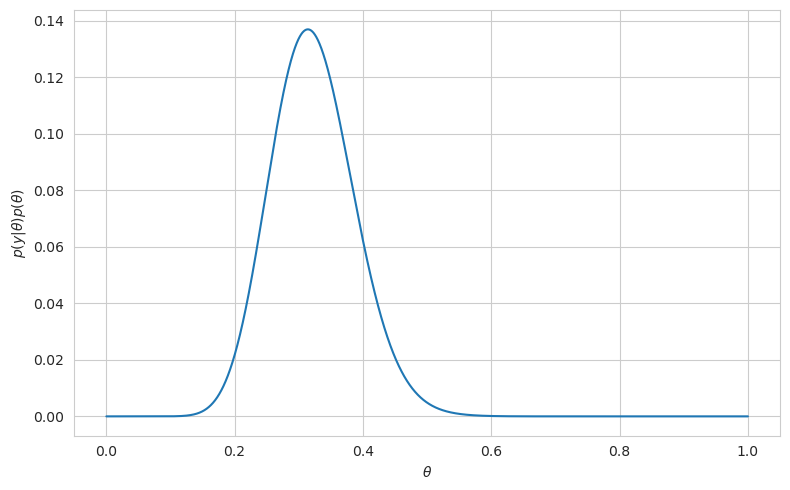

In [197]:
fig, ax = plt.subplots(figsize=(8, 5))

(likelihood * prior).plot(ax=ax)
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$p(y|\\theta)p(\\theta)$')

fig.tight_layout()
fig.show()

In [196]:
post = likelihood * prior
post /= (likelihood * prior).sum()
cdf = post.cumsum()
cdf[(cdf >= 0.025) & (cdf <= (1-0.025))]

0.203638    0.025001
0.203639    0.025002
0.203640    0.025003
0.203641    0.025004
0.203642    0.025005
              ...   
0.457751    0.974997
0.457752    0.974998
0.457753    0.974998
0.457754    0.974999
0.457755    0.975000
Length: 254118, dtype: float64

In [237]:
from scipy.special import beta

w1 = 3/4 * beta(17, 36)
w2 = 1/4 * beta(23, 30)
norm = w1 + w2
w1 /= norm
w2 /= norm

In [239]:
from collections import deque

nEpoch = 1000000

coin = stats.binom(n=1, p=w1)
coinSamples = deque(coin.rvs(nEpoch))
beta1 = stats.beta(a=17, b=36)
beta1Samples = deque(beta1.rvs(nEpoch))
beta2 = stats.beta(a=23, b=30)
beta2Samples = deque(beta2.rvs(nEpoch))

thetas = []
for epoch in range(nEpoch):
    if coinSamples.popleft() == 1:
        theta = beta1Samples.popleft()
    else:
        theta = beta2Samples.popleft()
    
    thetas.append(theta)

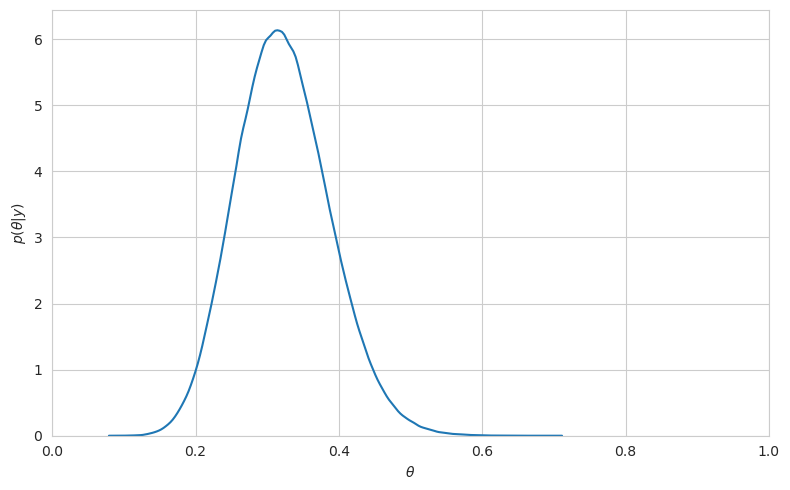

In [241]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(thetas, ax=ax)

ax.set_xlabel('$\\theta$')
ax.set_ylabel('$p(\\theta|y)$')
ax.set_xlim(0, 1)

fig.tight_layout()
fig.show()

In [244]:
np.quantile(thetas, 0.025), np.quantile(thetas, 0.975)

(0.20367623952254327, 0.4579261388390167)